# COSTUMER SEGMENTATION CLUSTERING

In [29]:
from sklearn.cluster import KMeans
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import LabelBinarizer


from matplotlib import style


In [30]:
style.use('Solarize_Light2')

## IMPORT DATA

In [31]:
data = pd.read_csv('./dataset.csv')
data

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,4/9/2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,8/3/2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10/2/2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10/6/2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


## ANALISIS DATA

Apakah ada missing value? Atau yang lain yang dapat kita olah datanya?

In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

## APA YANG KITA TEMUKAN DARI INFORMASI DATA DIATAS?


- Pada kolom variabel Income terdapat missing value
- Pada kolom Dt_Customer data nilai terimport bukan sebagai datetime

## DATA CLEANING

Ayo kita selesaikan masalah diatas

In [33]:
# Drop null value
data.dropna(inplace=True, subset=['Income'])

# Mengubah menjadi datetime

data["Dt_Customer"] = pd.to_datetime(data["Dt_Customer"])


C:\Users\Ulin\AppData\Local\Temp\ipykernel_21916\1409529353.py:6: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  data["Dt_Customer"] = pd.to_datetime(data["Dt_Customer"])


In [34]:
data["Education"].value_counts()

Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: Education, dtype: int64

In [35]:
## MEMBAGI TINGKAT PENDIDIKAN 

def tingkat_pendidikan(pendidikan):
    if pendidikan in ["Graduation", "PhD", "Master"]:
        return "Tinggi"
    else:
        return "Rendah"
    
tingkat_pendidikann = data["Education"].apply(tingkat_pendidikan)

# MENGGANTI TAHUN LAHIR MENJADI UMUR




In [36]:
data["Education"] = tingkat_pendidikann

In [37]:
tahun = 2023

data["Year_Birth"] = tahun -  data["Year_Birth"]
data = data.rename(columns={"Year_Birth":"Umur"})

In [38]:
data.columns

Index(['ID', 'Umur', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [39]:
# MENGHAPUS KOLOM YANG TIDAK DIBUTUHKAN

data.drop(columns=["AcceptedCmp3", "AcceptedCmp4", "AcceptedCmp5", "AcceptedCmp1", "AcceptedCmp2", "Z_CostContact", "Z_Revenue", "NumDealsPurchases", "NumWebPurchases", "NumCatalogPurchases", "NumStorePurchases", "NumWebVisitsMonth", "Complain"])

,ID,Umur,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,Response
0,5524,66,Tinggi,Single,58138.0,0,0,2012-04-09,58,635,88,546,172,88,88,1
1,2174,69,Tinggi,Single,46344.0,1,1,2014-08-03,38,11,1,6,2,1,6,0
2,4141,58,Tinggi,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,0
3,6182,39,Tinggi,Together,26646.0,1,0,2014-10-02,26,11,4,20,10,3,5,0
4,5324,42,Tinggi,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,56,Tinggi,Married,61223.0,0,1,2013-06-13,46,709,43,182,42,118,247,0
2236,4001,77,Tinggi,Together,64014.0,2,1,2014-10-06,56,406,0,30,0,0,8,0
2237,7270,42,Tinggi,Divorced,56981.0,0,0,2014-01-25,91,908,48,217,32,12,24,0
2238,8235,67,Tinggi,Together,69245.0,0,1,2014-01-24,8,428,30,214,80,30,61,0


In [40]:
data.columns

Index(['ID', 'Umur', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

### MENAMBAHKAN KOLOM JUMLAH BELI

In [41]:
# Jumlah beli
data['jumlah_beli'] = data["MntFishProducts"] + data["MntSweetProducts"] + data["MntWines"] + data["MntGoldProds"] + data["MntMeatProducts"] + data["MntFruits"]
# Anak di keluarga costumer
data["Anak"] = data["Kidhome"] + data["Teenhome"]
# Tinggal dengan
data["Tinggal"] =  data["Marital_Status"].replace({"Married":"Partner", "Together":"Partner", "Absurd":"Alone", "Widow":"Alone", "YOLO":"Alone", "Divorced":"Alone", "Single":"Alone",})
# Anggota keluarga costumer
data["Jumlah_keluarga"] = data["Anak"] + data["Tinggal"].replace({"Partner": 2, "Alone":1})
# Apakah costumer orang tua?
data["is_orang_tua"] = LabelBinarizer().fit_transform(data["Anak"] > 0)

In [42]:
data

,ID,Umur,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,jumlah_beli,Anak,Tinggal,Jumlah_keluarga,is_orang_tua
0,5524,66,Tinggi,Single,58138.0,0,0,2012-04-09,58,635,...,0,0,3,11,1,1617,0,Alone,1,0
1,2174,69,Tinggi,Single,46344.0,1,1,2014-08-03,38,11,...,0,0,3,11,0,27,2,Alone,3,1
2,4141,58,Tinggi,Together,71613.0,0,0,2013-08-21,26,426,...,0,0,3,11,0,776,0,Partner,2,0
3,6182,39,Tinggi,Together,26646.0,1,0,2014-10-02,26,11,...,0,0,3,11,0,53,1,Partner,3,1
4,5324,42,Tinggi,Married,58293.0,1,0,2014-01-19,94,173,...,0,0,3,11,0,422,1,Partner,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,56,Tinggi,Married,61223.0,0,1,2013-06-13,46,709,...,0,0,3,11,0,1341,1,Partner,3,1
2236,4001,77,Tinggi,Together,64014.0,2,1,2014-10-06,56,406,...,0,0,3,11,0,444,3,Partner,5,1
2237,7270,42,Tinggi,Divorced,56981.0,0,0,2014-01-25,91,908,...,0,0,3,11,0,1241,0,Alone,1,0
2238,8235,67,Tinggi,Together,69245.0,0,1,2014-01-24,8,428,...,0,0,3,11,0,843,1,Partner,3,1


In [43]:
data_copy = data.copy()

In [44]:
data_copy = data_copy.drop(columns=["Marital_Status", "Education", "Tinggal", "Dt_Customer", "ID"])

## DATA PREPROCESSING

In [45]:
scale = StandardScaler()
ds = pd.DataFrame(scale.fit_transform(data_copy), columns=data_copy.columns)

In [46]:
data_copy

,Umur,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,jumlah_beli,Anak,Jumlah_keluarga,is_orang_tua
0,66,58138.0,0,0,58,635,88,546,172,88,...,0,0,0,3,11,1,1617,0,1,0
1,69,46344.0,1,1,38,11,1,6,2,1,...,0,0,0,3,11,0,27,2,3,1
2,58,71613.0,0,0,26,426,49,127,111,21,...,0,0,0,3,11,0,776,0,2,0
3,39,26646.0,1,0,26,11,4,20,10,3,...,0,0,0,3,11,0,53,1,3,1
4,42,58293.0,1,0,94,173,43,118,46,27,...,0,0,0,3,11,0,422,1,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,56,61223.0,0,1,46,709,43,182,42,118,...,0,0,0,3,11,0,1341,1,3,1
2236,77,64014.0,2,1,56,406,0,30,0,0,...,1,0,0,3,11,0,444,3,5,1
2237,42,56981.0,0,0,91,908,48,217,32,12,...,0,0,0,3,11,0,1241,0,1,0
2238,67,69245.0,0,1,8,428,30,214,80,30,...,0,0,0,3,11,0,843,1,3,1


In [47]:
ds

,Umur,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,jumlah_beli,Anak,Jumlah_keluarga,is_orang_tua
0,0.986443,0.234063,-0.823039,-0.928972,0.310532,0.978226,1.549429,1.690227,2.454568,1.484827,...,-0.261661,-0.117148,-0.097812,0.0,0.0,2.377952,1.675488,-1.264803,-1.758673,-1.581389
1,1.236801,-0.234559,1.039938,0.909066,-0.380509,-0.872024,-0.637328,-0.717986,-0.651038,-0.633880,...,-0.261661,-0.117148,-0.097812,0.0,0.0,-0.420530,-0.962358,1.405806,0.450009,0.632356
2,0.318822,0.769478,-0.823039,-0.928972,-0.795134,0.358511,0.569159,-0.178368,1.340203,-0.146821,...,-0.261661,-0.117148,-0.097812,0.0,0.0,-0.420530,0.280250,-1.264803,-0.654332,-1.581389
3,-1.266777,-1.017239,1.039938,-0.928972,-0.795134,-0.872024,-0.561922,-0.655551,-0.504892,-0.585174,...,-0.261661,-0.117148,-0.097812,0.0,0.0,-0.420530,-0.919224,0.070501,0.450009,0.632356
4,-1.016420,0.240221,1.039938,-0.928972,1.554407,-0.391671,0.418348,-0.218505,0.152766,-0.000703,...,-0.261661,-0.117148,-0.097812,0.0,0.0,-0.420530,-0.307044,0.070501,0.450009,0.632356
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2211,0.151917,0.356642,-0.823039,0.909066,-0.104093,1.197646,0.418348,0.066913,0.079693,2.215416,...,-0.261661,-0.117148,-0.097812,0.0,0.0,-0.420530,1.217598,0.070501,0.450009,0.632356
2212,1.904422,0.467539,2.902916,0.909066,0.241428,0.299208,-0.662463,-0.610954,-0.687574,-0.658233,...,3.821732,-0.117148,-0.097812,0.0,0.0,-0.420530,-0.270546,2.741110,2.658691,0.632356
2213,-1.016420,0.188091,-0.823039,-0.928972,1.450751,1.787710,0.544024,0.223001,-0.102990,-0.365998,...,-0.261661,-0.117148,-0.097812,0.0,0.0,-0.420530,1.051696,-1.264803,-1.758673,-1.581389
2214,1.069896,0.675388,-0.823039,0.909066,-1.417072,0.364441,0.091591,0.209622,0.773887,0.072356,...,-0.261661,-0.117148,-0.097812,0.0,0.0,-0.420530,0.391404,0.070501,0.450009,0.632356


In [48]:
data_copy

,Umur,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,jumlah_beli,Anak,Jumlah_keluarga,is_orang_tua
0,66,58138.0,0,0,58,635,88,546,172,88,...,0,0,0,3,11,1,1617,0,1,0
1,69,46344.0,1,1,38,11,1,6,2,1,...,0,0,0,3,11,0,27,2,3,1
2,58,71613.0,0,0,26,426,49,127,111,21,...,0,0,0,3,11,0,776,0,2,0
3,39,26646.0,1,0,26,11,4,20,10,3,...,0,0,0,3,11,0,53,1,3,1
4,42,58293.0,1,0,94,173,43,118,46,27,...,0,0,0,3,11,0,422,1,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,56,61223.0,0,1,46,709,43,182,42,118,...,0,0,0,3,11,0,1341,1,3,1
2236,77,64014.0,2,1,56,406,0,30,0,0,...,1,0,0,3,11,0,444,3,5,1
2237,42,56981.0,0,0,91,908,48,217,32,12,...,0,0,0,3,11,0,1241,0,1,0
2238,67,69245.0,0,1,8,428,30,214,80,30,...,0,0,0,3,11,0,843,1,3,1


## EXPLORATORY  DATA ANALYIS

(array([187., 502., 678., 533., 298.,  15.,   0.,   0.,   0.,   3.]),
 array([ 27. ,  37.3,  47.6,  57.9,  68.2,  78.5,  88.8,  99.1, 109.4,
        119.7, 130. ]),
 <BarContainer object of 10 artists>)

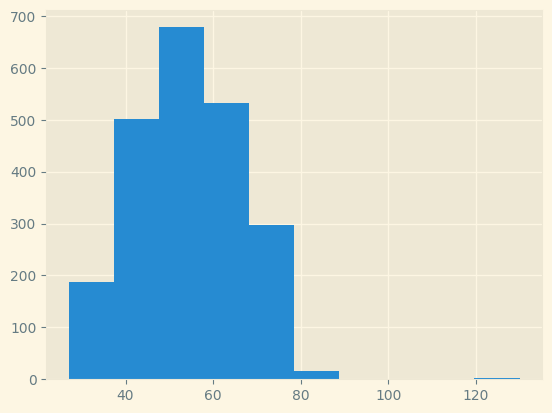

In [49]:
plt.hist(data_copy["Umur"])


## DIMENSIONAL REDUCTION

In [50]:
pca = PCA(n_components=2)

pcads = pd.DataFrame(pca.fit_transform(ds), columns=["1", "2"])



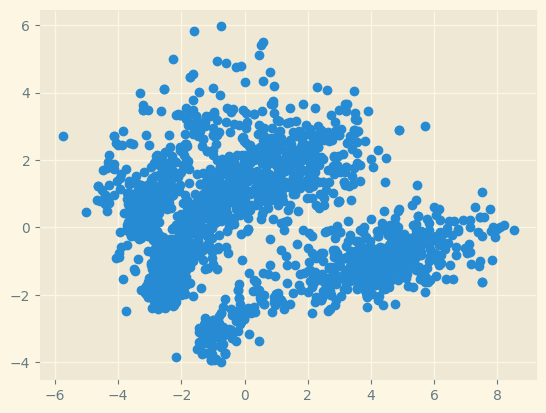

In [51]:
plt.scatter(pcads["1"], pcads["2"])

c:\Users\Ulin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


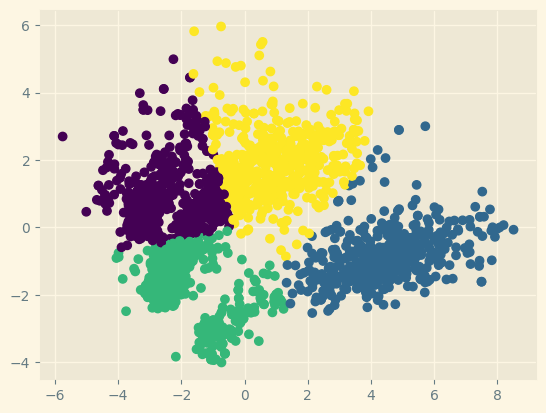

In [52]:
kmean = np.array([pcads["1"], pcads["2"]])
kmeans = KMeans(n_clusters=4)

kmeans.fit_transform(pcads)

plt.scatter(pcads["1"], pcads["2"], c=kmeans.labels_)




In [53]:
data_copy["labels"] = kmeans.labels_

## EVALUASI

In [54]:
# data_copy["Labels"] = pca_ds["Labels"]

In [55]:
data_copy["Income"].max()

666666.0

Text(0, 0.5, 'PENDAPATAN')

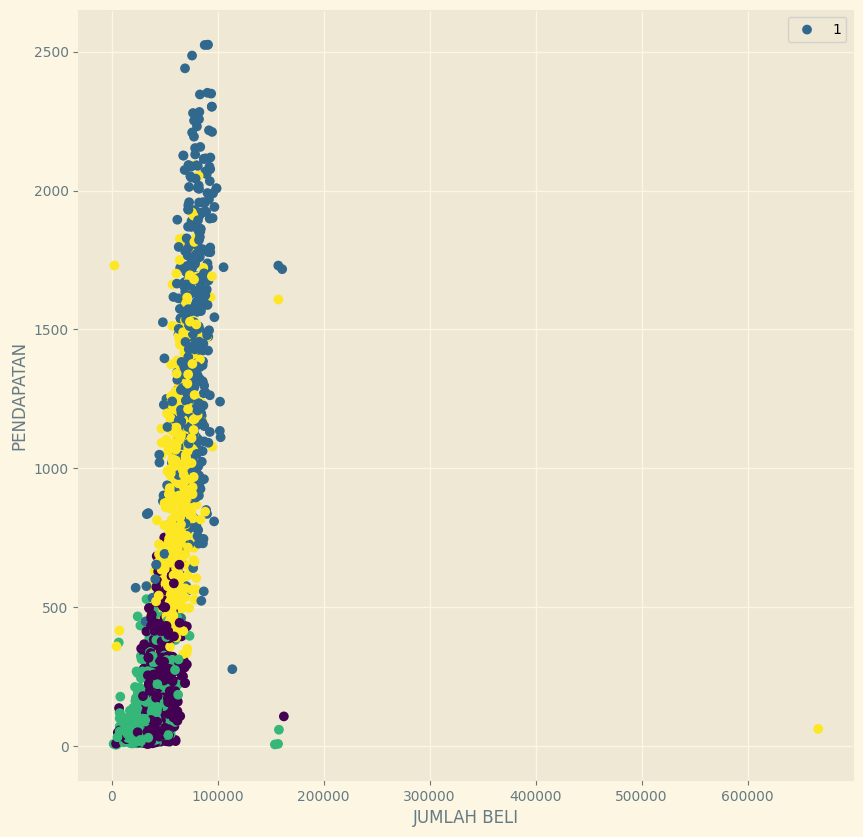

In [58]:
plt.figure(figsize=(10, 10))
plt.scatter(data_copy["Income"], data_copy["jumlah_beli"], c=data_copy["labels"])
plt.legend(data_copy["labels"])
plt.xlabel("JUMLAH BELI")
plt.ylabel("PENDAPATAN")